<a href="https://colab.research.google.com/github/singithi03/Data-Analytics_s5214680/blob/Lab---3/Lab_3_s5214680.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **I.Classification**

In [ ]:
#import necessary modeules
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import pandas as pd

#Load the dataset
digits = datasets.load_digits()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#create features and target arrays
X = digits.data
y = digits.target

#Split in to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) 

# **1. K-nearest Neighbors**

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)
kNN.score(X_test,y_test)

0.975

In [ ]:
#Plot accuracy for 8 values
tr =[]
te = []
for i in range(1,8):
  kNN = KNeighborsClassifier(n_neighbors=i)
  kNN.fit(X_train, y_train)
  tr.append(kNN.score(X_train,y_train))
  te.append(kNN.score(X_test,y_test))
te


[0.975,
 0.9638888888888889,
 0.975,
 0.9722222222222222,
 0.9777777777777777,
 0.9722222222222222,
 0.975]

In [ ]:
tr

[1.0,
 0.9958246346555324,
 0.9965205288796103,
 0.9944328462073765,
 0.9937369519832986,
 0.9916492693110647,
 0.9937369519832986]

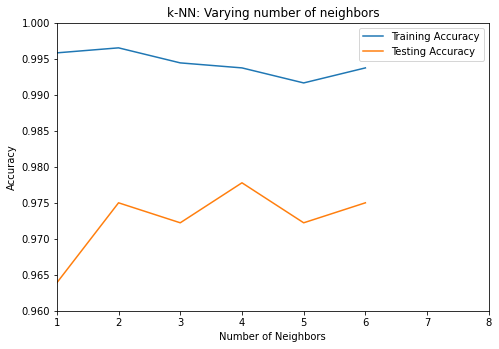

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_xlim(1,8)
ax.set_ylim(0.960,1)

ax.plot(tr, label='Training Accuracy')
ax.plot(te, label='Testing Accuracy')

ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Accuracy')
ax.set_title('k-NN: Varying number of neighbors')
ax.legend()

# *The best K is 4. Because, the highest accuracy we get at neighbor size 4, which is 0.977.

# **2. Support Vector Machine**

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      0.98      0.98        44
           2       0.97      1.00      0.99        37
           3       0.98      0.98      0.98        43
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        30
           7       0.97      1.00      0.99        39
           8       0.91      0.94      0.92        32
           9       1.00      0.92      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [ ]:
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        44
           2       0.97      1.00      0.99        37
           3       1.00      0.98      0.99        43
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        39
           8       0.94      1.00      0.97        32
           9       1.00      0.94      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.82      0.75      0.79        44
           2       1.00      0.92      0.96        37
           3       0.95      0.95      0.95        43
           4       0.93      0.93      0.93        29
           5       1.00      0.97      0.99        35
           6       1.00      1.00      1.00        30
           7       0.83      1.00      0.91        39
           8       0.74      0.81      0.78        32
           9       0.82      0.75      0.78        36

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360



# *Above compared the three svm kernel namely linear, poly and sigmoid. The accuracy for poly kernel shows the highest accuracy 0.99, the lowest accuracy is 0.91 using sigmoid kernel.

# **3. Naive Bayes**

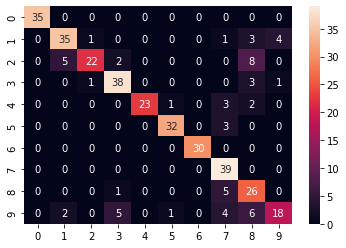

In [ ]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf_m = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_m, annot=True)

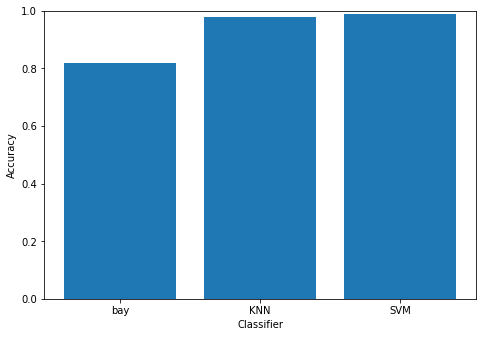

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_ylim(0,1)
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')


# Model Accuracy, how often is the classifier correct?

bay = 0.82
KNN = 0.977
svmm = 0.99

classifier = ['bay', 'KNN', 'SVM']
accuracy = [bay, KNN, svmm]
ax.bar(classifier, accuracy)
plt.show()

### **II. REGRESSION**

## **1.Linear Regression**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

gap = pd.read_csv('gapminder.csv')
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
